# Diarization Showcase

## Imports

In [12]:
from simple_diarizer.diarizer import Diarizer
from simple_diarizer.utils import (check_wav_16khz_mono, convert_wavfile,
                                   waveplot, combined_waveplot, waveplot_perspeaker)

import os
import tempfile
from pprint import pprint

import matplotlib.pyplot as plt
import soundfile as sf

from IPython.display import Audio, display, HTML, IFrame
from tqdm.autonotebook import tqdm

torchvision is not available - cannot save figures


## Helper functions for diarizing YouTube

In [13]:
#!pip install pytube
from pytube.extract import video_id
import subprocess
import validators


def get_youtube_id(url):
    """
    Returns the youtube id for a youtube URL
    """
    return video_id(url)

def download_youtube_wav(youtube_id, outfolder='./', overwrite=True):
    """
    Download the audio for a YouTube id/URL
    """
    if validators.url(youtube_id):
        youtube_id = video_id(youtube_id)

    os.makedirs(outfolder, exist_ok=True)

    outfile = os.path.join(outfolder, '{}.wav'.format(youtube_id))
    if not overwrite:
        if os.path.isfile(outfile):
            return outfile

    cmd = "youtube-dl --no-continue --extract-audio --audio-format wav -o '{}' {}".format(
        outfile, youtube_id)
    subprocess.Popen(cmd, shell=True).wait()

    assert os.path.isfile(outfile), "Couldn't find expected outfile, something went wrong"
    return outfile


def diarize_yt(youtube_url, diar, ns=None):
    youtube_id = get_youtube_id(youtube_url)
    with tempfile.TemporaryDirectory() as outdir:
        print("Downloading wav file...")
        yt_file = download_youtube_wav(youtube_id, outdir)

        wav_file = convert_wavfile(yt_file, f"{outdir}/{youtube_id}_converted.wav")
        signal, fs = sf.read(wav_file)

        print(f"Diarizing {youtube_id}...")
        segments = diar.diarize(wav_file, 
                                num_speakers=ns,
                                outfile=f"{outdir}/{youtube_id}.rttm")
        return segments, (signal, fs)

In [14]:
diar = Diarizer(
                embed_model='ecapa', # supported types: ['xvec', 'ecapa']
                cluster_method='sc', # supported types: ['ahc', 'sc']
                window=1.5, # size of window to extract embeddings (in seconds)
                period=0.75 # hop of window (in seconds)
                )

/home/midnight/miniconda3/envs/School/lib/python3.9/site-packages/torch/hub.py:267: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/snakers4/silero-vad/zipball/master" to /home/midnight/.cache/torch/hub/master.zip
Downloading: 100%|██████████| 1.92k/1.92k [00:00<00:00, 695kB/s]
Downloading: 100%|██████████| 83.3M/83.3M [00:06<00:00, 13.6MB/s]
Downloading: 100%|██████████| 1.92k/1.92k [00:00<00:00, 697kB/s]
Downloading: 100%

## It's Always Sunny in Philadelphia (Pepe Silvia)


In [22]:
import IPython
iasip_video = "https://www.youtube.com/watch?v=ghrdSTC66MA"
#HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/{}?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>'.format(get_youtube_id(iasip_video)))
IPython.display.IFrame(f"https://www.youtube.com/embed/{get_youtube_id(iasip_video)}?rel=0&amp;controls=0&amp;showinfo=0",width="560", height="315")

### Calling and Specifying speakers

In [ ]:
iasip_segments, (iasip_signal, fs) = diarize_yt(iasip_video, diar, 2)

Diarizing ghrdSTC66MA...
Running VAD...
Splitting by silence found 13 utterances
Extracting embeddings...


Utterances:   0%|          | 0/13 [00:00<?, ?it/s]

Clustering to 2 speakers...
Cleaning up output...
Done!


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_spectral_embedding.py:234: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)


#### Visualizing Data

In [ ]:
waveplot(iasip_signal, fs, figsize=(20,3))
plt.show()

#### Graphing

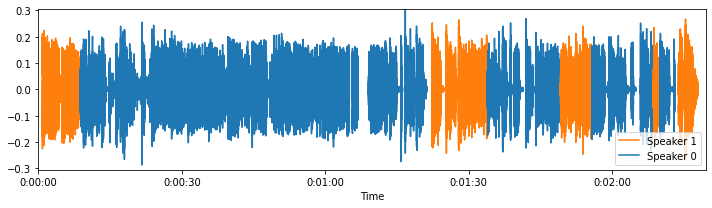

In [ ]:
combined_waveplot(iasip_signal, fs, iasip_segments, tick_interval=30)
plt.show()

#### Audio Segments

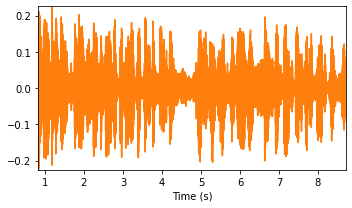

Speaker 1 (0.834s - 8.709s)


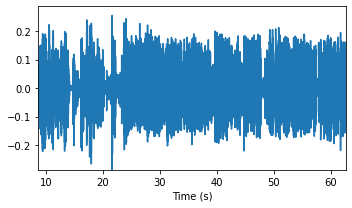

Speaker 0 (8.709s - 62.5899375s)


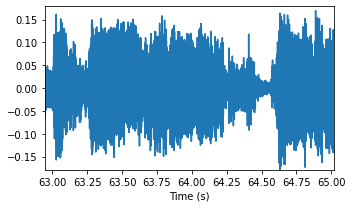

Speaker 0 (62.946s - 65.0219375s)


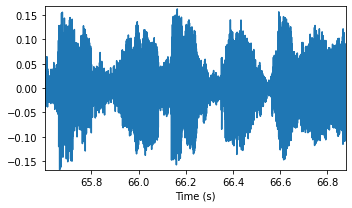

Speaker 0 (65.602s - 66.8779375s)


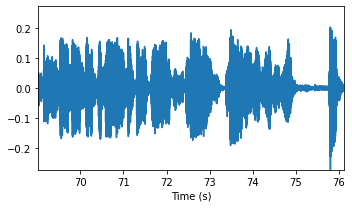

Speaker 0 (69.026s - 76.1259375s)


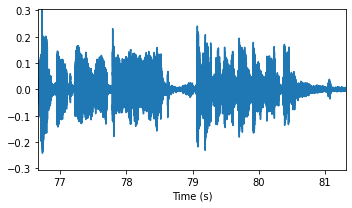

Speaker 0 (76.674s - 81.3099375s)


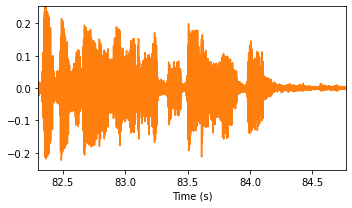

Speaker 1 (82.306s - 84.7659375s)


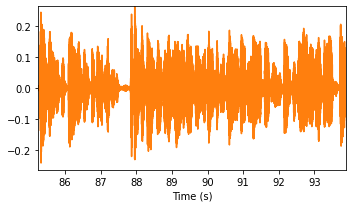

Speaker 1 (85.25s - 93.875s)


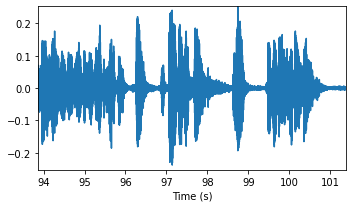

Speaker 0 (93.875s - 101.3739375s)


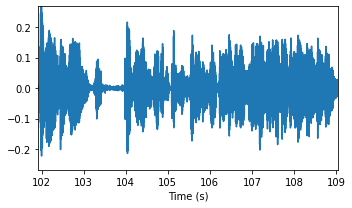

Speaker 0 (101.922s - 109.047s)


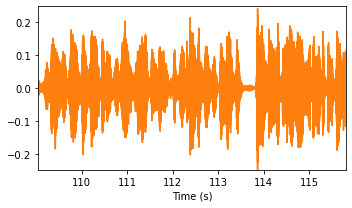

Speaker 1 (109.047s - 115.797s)


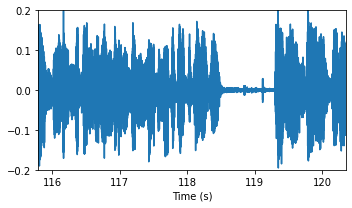

Speaker 0 (115.797s - 120.3499375s)


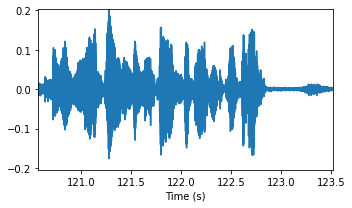

Speaker 0 (120.578s - 123.5179375s)


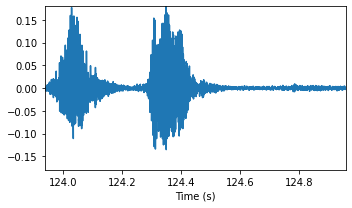

Speaker 0 (123.938s - 124.9579375s)


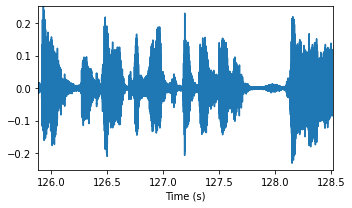

Speaker 0 (125.89s - 128.515s)


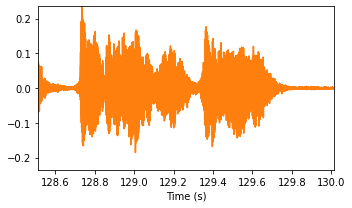

Speaker 1 (128.515s - 130.015s)


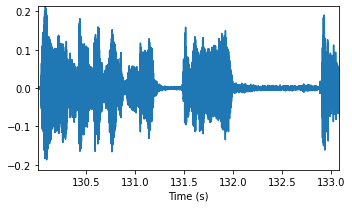

Speaker 0 (130.015s - 133.0859375s)


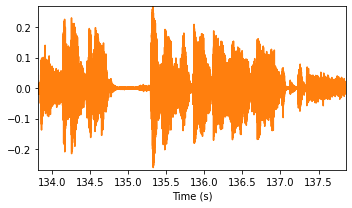

Speaker 1 (133.826s - 137.8539375s)


In [ ]:
waveplot_perspeaker(iasip_signal, fs, iasip_segments)

Scrolling through the snippets the speaker segments are isolated correctly but the transcripts are not aligned well